# 問題１　練習のための特徴量の選択

In [2]:
import pandas as pd
data = pd.read_csv('../train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dim2_df =data.loc[:,['GrLivArea','YearBuilt']] 
dim2_df.head(10)

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


# 問題2 線形回帰による推定と評価

In [5]:
#データの分析

#欠損値の確認
dim2_df.isnull().sum()


GrLivArea    0
YearBuilt    0
dtype: int64

In [6]:
#前処理
from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
dim2_standard = scr.fit_transform(dim2_df.values)

# 1次元データを使用

In [8]:
#推定、評価
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

lr_1 = LinearRegression()
y = np.array(data.loc[:,'SalePrice'].values)
X_Gr = dim2_standard[:,0].reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_Gr, y, test_size=0.2,
                                                shuffle=True)
#print(X_Gr.shape)
lr_1 = lr_1.fit(X_train, y_train)

y_pred1 = lr_1.predict(X_test)
score1 = mean_squared_error(y_test,y_pred1)
print('被説明変数をGrLivAreaとしたときのMSE:{}'.format(score1))


lr_2 = LinearRegression()
X_YB = dim2_standard[:,1].reshape(-1,1)
X_train,X_test,y_train, y_test = train_test_split(X_YB, y, test_size=0.2,
                                                shuffle=True)
lr_2 = lr_2.fit(X_train,y_train)

y_pred2 = lr_2.predict(X_test)
score2 = mean_squared_error(y_test,y_pred2)
print('被説明変数をYearBuiltとしたときのMSE:{}'.format(score2))

被説明変数をGrLivAreaとしたときのMSE:2311014800.4489503
被説明変数をYearBuiltとしたときのMSE:5891456873.184694


In [9]:
#可視化
import matplotlib.pyplot as plt
%matplotlib inline

def plot_DecisionRegion_2d(df,classifier):
    X = df.iloc[:,0]
    y = df.iloc[:,1]
    plt.scatter(X,y,color='Orange')
    X_min,X_max = np.min(X),np.max(X)
    X = np.linspace(X_min,X_max,1000)
    pred = classifier.predict(X.reshape(-1,1))
    plt.plot(X,pred)

    

In [15]:
df_dim2_standard = pd.DataFrame(data=dim2_standard,
                          columns=['GrLivArea','YearBuilt'])
df_dim2_standard['SalePrice'] = y
df_dim2_standard.head()

,GrLivArea,YearBuilt,SalePrice
0,0.370333,1.050994,208500
1,-0.482512,0.156734,181500
2,0.515013,0.984752,223500
3,0.383659,-1.863632,140000
4,1.299326,0.951632,250000


In [16]:
df_Gr = df_dim2_standard.copy()
del df_Gr['YearBuilt']
df_Gr.head()


,GrLivArea,SalePrice
0,0.370333,208500
1,-0.482512,181500
2,0.515013,223500
3,0.383659,140000
4,1.299326,250000


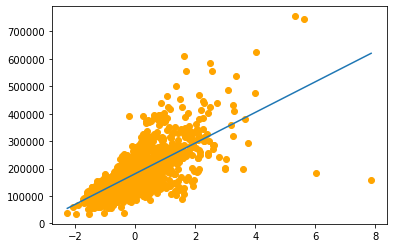

In [17]:
plot_DecisionRegion_2d(df_Gr,lr_1)

In [18]:
df_YB = df_dim2_standard.copy()
del df_YB['GrLivArea']
df_YB.head()

,YearBuilt,SalePrice
0,1.050994,208500
1,0.156734,181500
2,0.984752,223500
3,-1.863632,140000
4,0.951632,250000


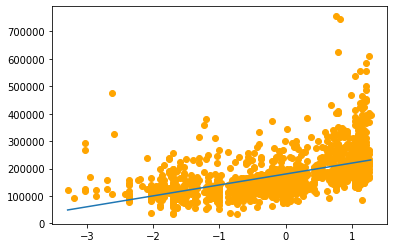

In [19]:
plot_DecisionRegion_2d(df_YB,lr_2)

# 2次元データを使用

In [25]:
print(y.shape)
print(dim2_standard.shape)
X_train,X_test,y_train,y_test = train_test_split(dim2_standard,y)

(1460,)
(1460, 2)


In [26]:
#推定、評価

lr = LinearRegression()
lr = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
#print(type(y_pred))
#print(type(y_train))
score = mean_squared_error(y_true = y_test,y_pred = y_pred)
print('2変数による回帰のMSE:{}'.format(score))


2変数による回帰のMSE:2303950664.4784727


In [27]:
#可視化


from mpl_toolkits.mplot3d import Axes3D

def plot_DecisionRegion_3d(df,classifier):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(1,1,1,projection='3d')
    ax.plot(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],linestyle='None',marker='o')
    
    X0_max = np.max(np.array(df.iloc[:,0]))
    X0_min = np.min(np.array(df.iloc[:,0]))
    X1_max = np.max(np.array(df.iloc[:,1]))
    X1_min = np.min(np.array(df.iloc[:,1]))
    
    X0 = np.linspace(X0_min,X0_max,100)
    X1 = np.linspace(X1_min,X1_max,100)
    xn = len(X0)
    xx0,xx1 = np.meshgrid(X0,X1)
    Z= classifier.predict(np.array([xx0.ravel(),xx1.ravel()]).T)
    print(len(Z))
    Z = Z.reshape(xn,xn)
    ax.plot_surface(xx0,xx1,Z)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    #plt.zlabel(df.columns[2])
    ax.view_init(20,-55)
    

10000


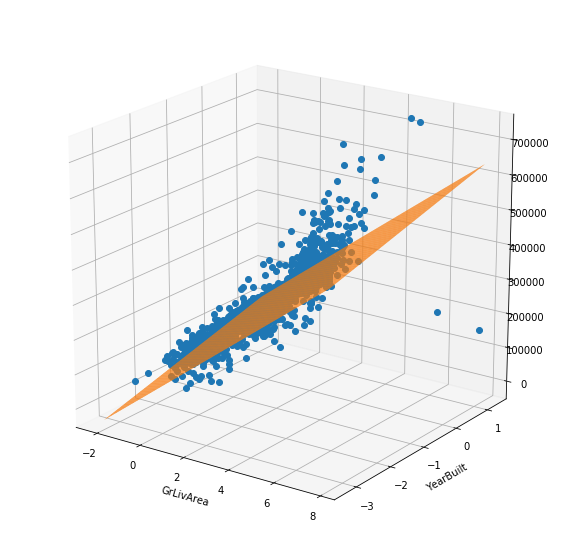

In [28]:
plot_DecisionRegion_3d(df_dim2_standard , lr)

# 問題3 手法の比較

In [37]:
#それぞれの手法を一度に学習・推定・評価・可視化する関数

def hybridcompute(estimator_list, df,est_names,
                  valuation=mean_squared_error):
    lr_dic = {}
    scores = {}
    X = df.iloc[:,0].values.reshape(-1,1)
    y = df.iloc[:,1].values
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                    shuffle=True)
    for estimator,est_name in zip(estimator_list,est_names):
        lr = estimator.fit(X_train,y_train)
        lr_dic[est_name] = lr
    
    plt.figure(1,figsize=(10,40))
    count = 1
    for est_name in est_names:
        plt.subplot(len(estimator_list),1,count)
        plt.scatter(X,y)
        X_min,X_max = np.min(X)-1,np.max(X)+1
        X_smp = np.linspace(X_min,X_max,1000)
        y_pred_smp = lr_dic[est_name].predict(X_smp.reshape(-1,1))
        plt.plot(X_smp,y_pred_smp)
        plt.title(est_name+ ' plot')
        count += 1
        
        y_pred = lr_dic[est_name].predict(X_test)
        scores[est_name] = valuation(y_test,y_pred)
    return scores

# GrLivArea	

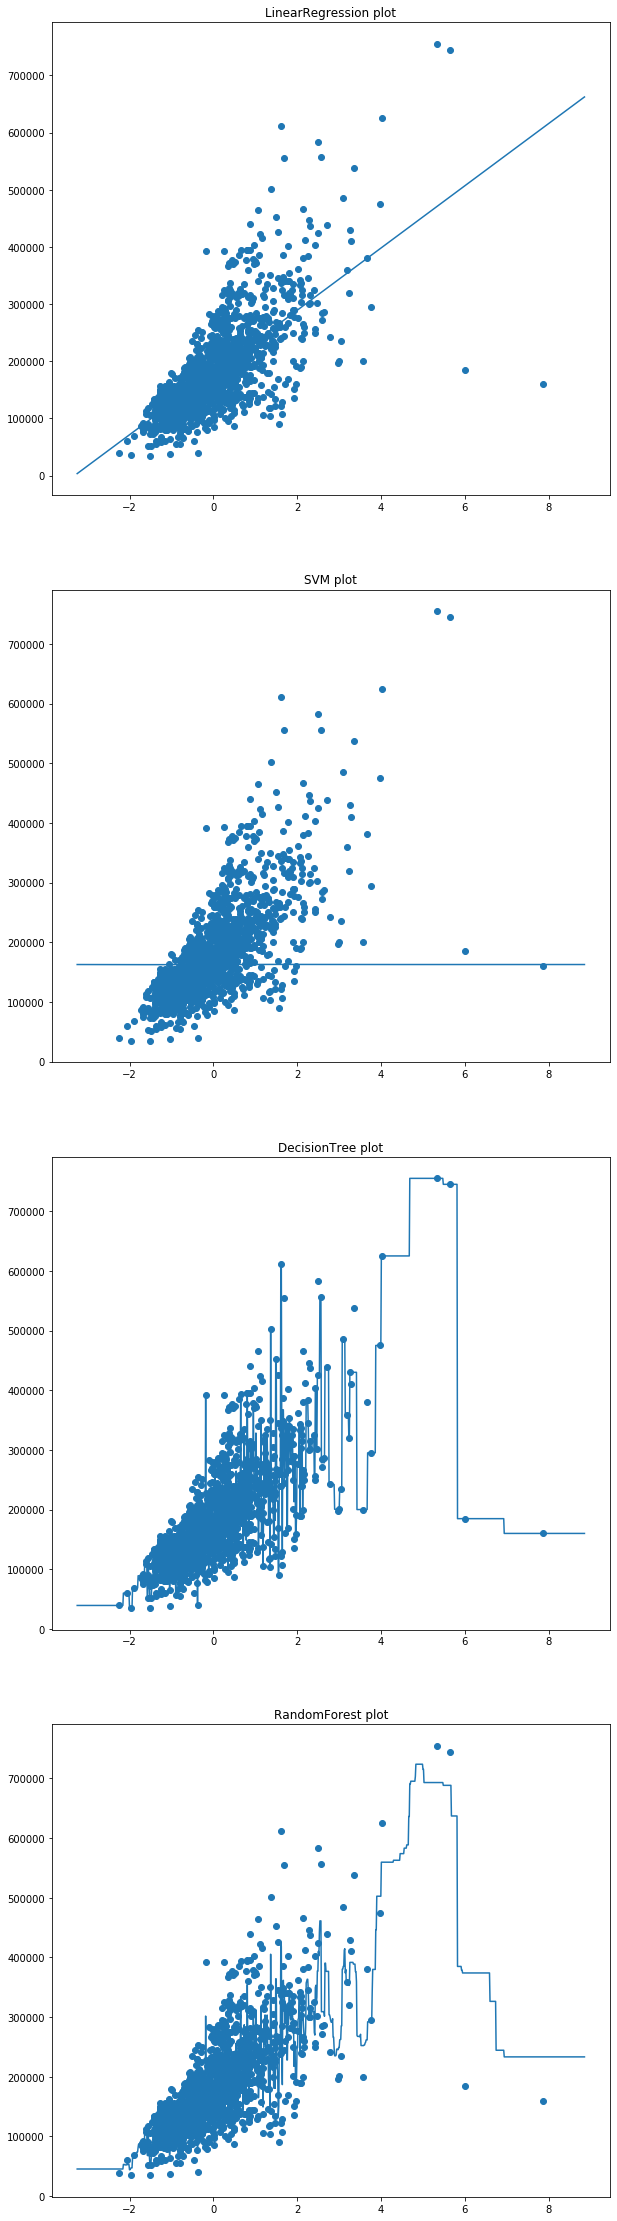

In [38]:

#線形回帰
#SVM
#決定木
#ランダムフォレスト

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

estimator1 = LinearRegression()
estimator2 = SVR()
estimator3 = DecisionTreeRegressor()
estimator4 = RandomForestRegressor()
estimator_list = [estimator1,estimator2,estimator3,estimator4]
est_names = ['LinearRegression','SVM','DecisionTree','RandomForest']
scores_Gr = hybridcompute(estimator_list,df_Gr,est_names)



        

# YearBuilt

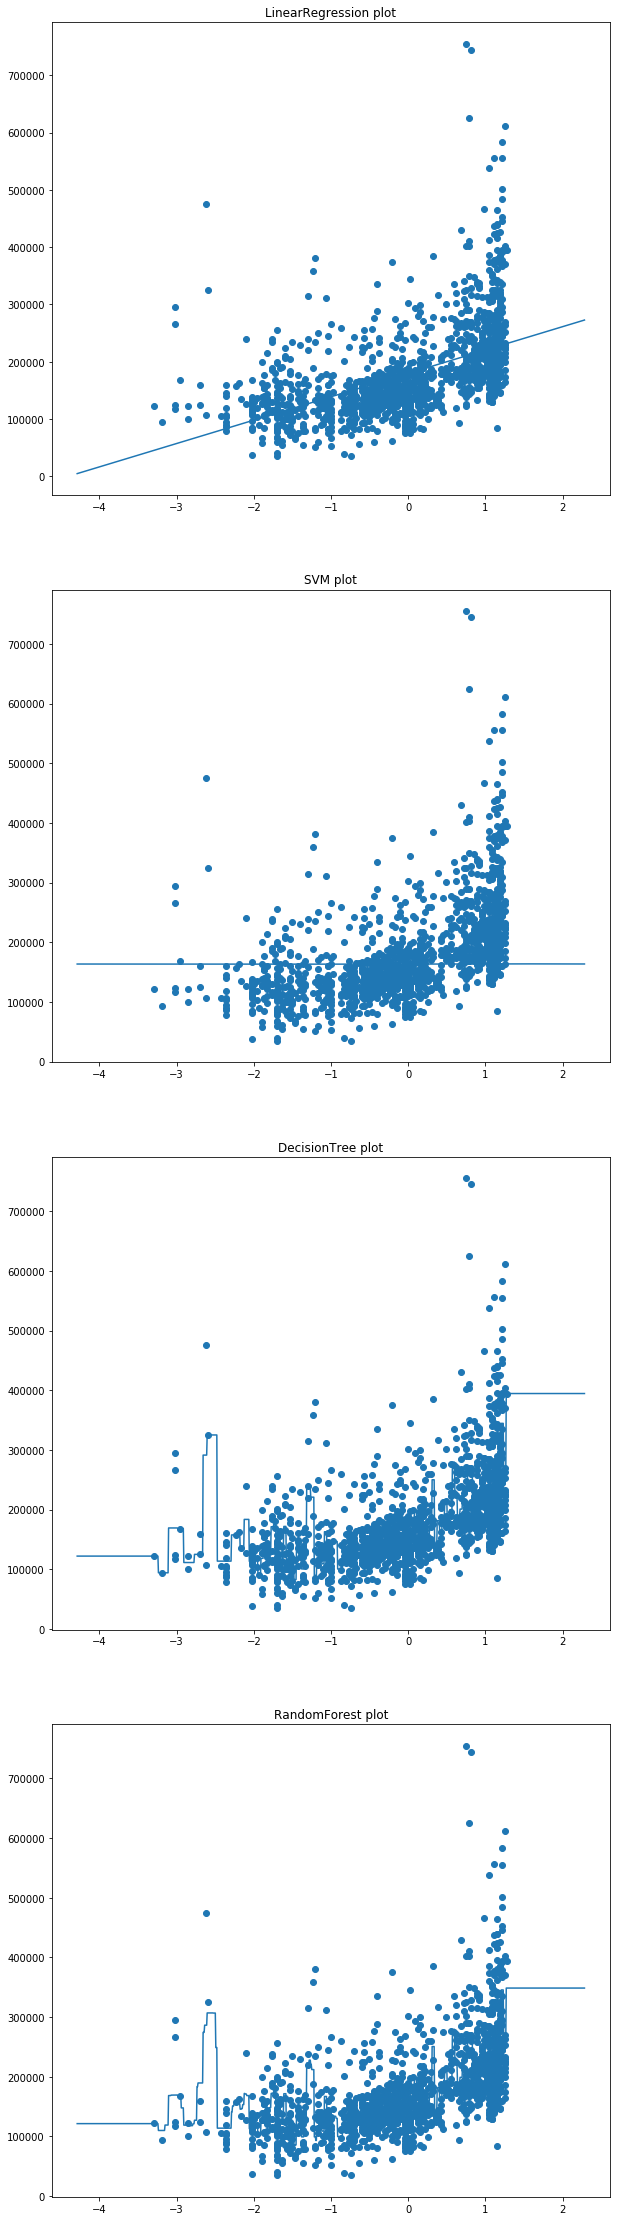

In [39]:
scores_YB = hybridcompute(estimator_list,df_YB,est_names)

# 評価した結果を表にまとめる

In [40]:
scoreboard = pd.DataFrame()
scoreboard['GrLivArea'] = scores_Gr.values()
scoreboard['YearBuilt'] = scores_YB.values()
scoreboard.index = scores_Gr.keys()
scoreboard
        

,GrLivArea,YearBuilt
LinearRegression,3.266369e+09,5.329877e+09
SVM,7.434712e+09,7.670152e+09
DecisionTree,5.455357e+09,4.667977e+09
RandomForest,4.282549e+09,4.624834e+09


データを使用し評価指標にはMSEを使用した場合に置いては、決定木、ランダムフォレスト、線形回帰、SVMの順に良い評価となっており、また、GrLivAreaによる回帰の方が良い評価を得られることがわかる。